In [1]:
# imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('precision', 4)
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.5f}'.format)

plt.style.use('seaborn')

# 9.6.1 Support Vector Classifier

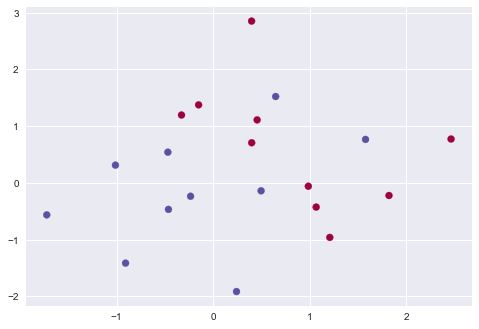

In [2]:
np.random.seed(42)

X = np.random.normal(size=40).reshape(20,2) # random한 40개 숫자 (20,2) 형태로
y = np.concatenate((np.ones(10, dtype=np.int64)*-1, np.ones(10, dtype=np.int64)))
## 위에서부터 -1이랑 1 10개씩 총 20개 (20,) 형태 

X[y == 1, :] += 1 ## y=1 이면 행 기준 1씩 더함

plt.scatter(X[:, 0], X[:, 1], c=(3-y), cmap='Spectral'); #X의 1열과 2열을 각각 x,y축으로

In [3]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=10) # 모델
svc.fit(X, y) # 모델 적합

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [4]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


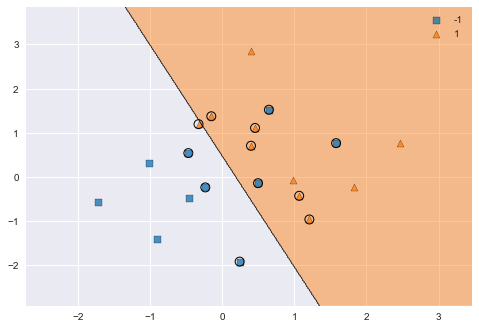

In [5]:
# using the excellent mlxtend package
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=svc, X_highlight=svc.support_vectors_); 
## support vector 동그라미 모양

In [6]:
# support vectors
pd.DataFrame(svc.support_vectors_, index=svc.support_)

,0,1
0,0.49671,-0.13826
1,0.64769,1.52303
2,-0.23415,-0.23414
3,1.57921,0.76743
4,-0.46947,0.54256
6,0.24196,-1.91328
11,1.06753,-0.42475
12,0.45562,1.11092
13,-0.15099,1.37570
14,0.39936,0.70831


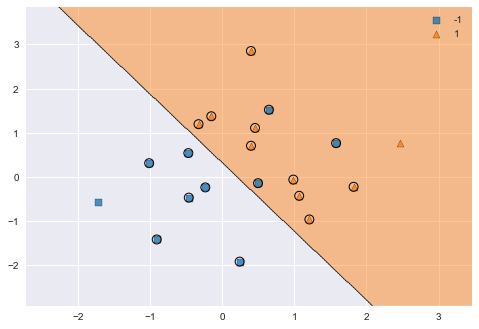

In [7]:
svc2 = SVC(kernel='linear', C=0.1) ## 또 다른 모델
svc2.fit(X, y)

plot_decision_regions(X, y, clf=svc2, X_highlight=svc2.support_vectors_);
## 잘못 분류한 거 3개(빨간 거)

In [8]:
# support vectors
pd.DataFrame(svc2.support_vectors_, index=svc2.support_)

,0,1
0,0.49671,-0.13826
1,0.64769,1.52303
2,-0.23415,-0.23414
3,1.57921,0.76743
4,-0.46947,0.54256
...,...,...
15,0.39829,2.85228
16,0.98650,-0.05771
17,1.82254,-0.22084
18,1.20886,-0.95967


In [9]:
from sklearn.model_selection import GridSearchCV

svc3 = SVC(kernel='linear')
c_space = np.array([0.001, 0.01, 0.1, 1, 5, 10, 100])
param_grid = {'C': c_space}
## GridSearch할 parameter 집합 선언

tune = GridSearchCV(svc3, param_grid, cv=10)
tune.fit(X, y)
## 미리 선언한 param_grid로 tune에 적합

tune.cv_results_
tune.best_params_ ## 최적의 parameter 찾기

{'C': 0.001}

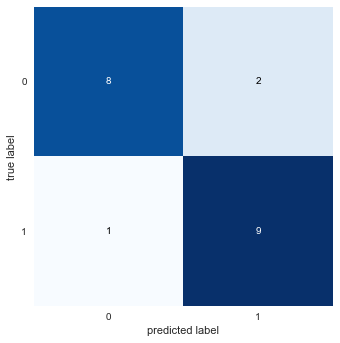

In [10]:
## 성능 평가
from sklearn.utils import resample

np.random.seed(42)
X_test = np.random.normal(size=40).reshape(20,2)
y_test = resample(np.concatenate((np.ones(10, dtype=np.int64)*-1, np.ones(10, dtype=np.int64))), ## 아까처럼 concatenate
                  replace=True,  ## 복원 추출
                  n_samples=20, random_state=42)
X_test[y_test == 1, :] += 1  ## 마찬가지 작업

y_pred = tune.predict(X_test) ## 예측

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test, y_pred)); ## confusion matrix

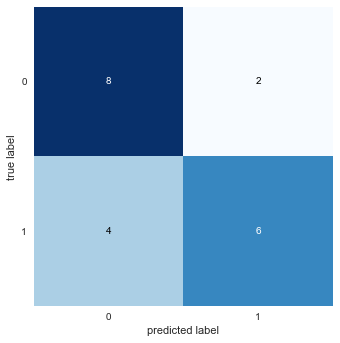

In [11]:
svc4 = SVC(kernel='linear', C=0.01) #모델
svc4.fit(X_test, y_test) # 적합

y_pred4 = svc4.predict(X_test) # 예측

plot_confusion_matrix(confusion_matrix(y_test, y_pred4));

In [12]:
X[y == 1, :] += 1.1  ## 갑자기..?!

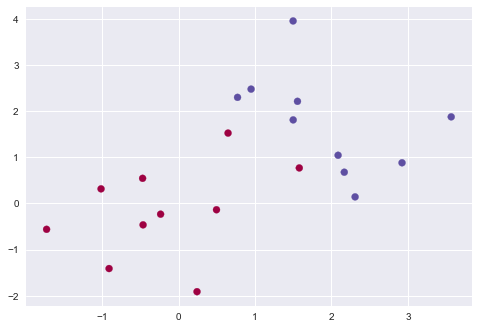

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=(y+5)/2, cmap='Spectral');

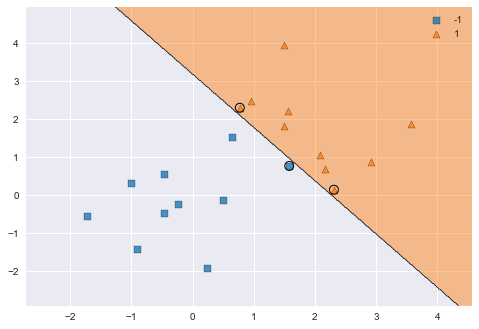

In [14]:
svc5 = SVC(kernel='linear', C=1e5)
svc5.fit(X, y)  ## C 달리 해서 또 다른 모델 적합

plot_decision_regions(X, y, clf=svc5, X_highlight=svc5.support_vectors_);

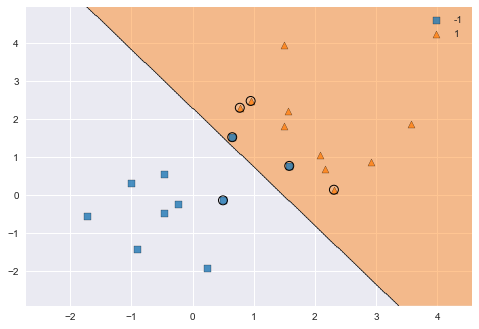

In [15]:
svc6 = SVC(kernel='linear', C=1)
svc6.fit(X, y)

plot_decision_regions(X, y, clf=svc6, X_highlight=svc6.support_vectors_);

# 9.6.2 Support Vector Machine

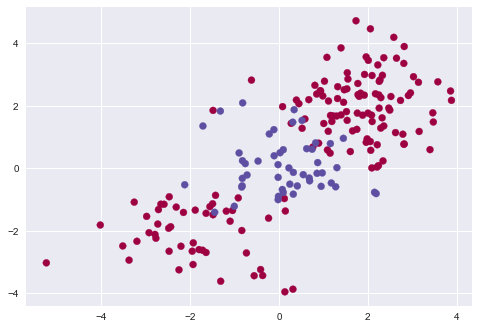

In [16]:
np.random.seed(42)

X = np.random.normal(size=400).reshape(200, 2) ## 400개를 (200,2) 형태로

X[0:100, :] += 2
X[100:150, :] -= 2
y = np.concatenate((np.full(150, 1, dtype=np.int64), np.full(50, 2, dtype=np.int64)))
## 150개의 1, 50개의 2를 concatenate

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral');

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)

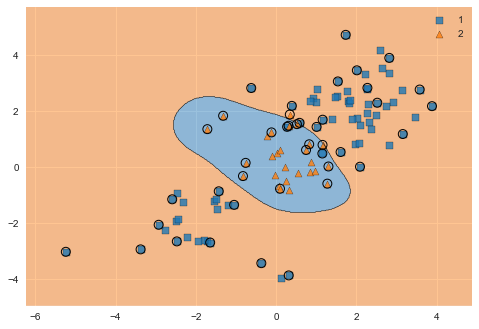

In [18]:
svm = SVC(kernel='rbf', gamma=1, C=1)
svm.fit(X_train, y_train) #모델 선언 및 적합

plot_decision_regions(X_train, y_train, clf=svm, X_highlight=svm.support_vectors_);

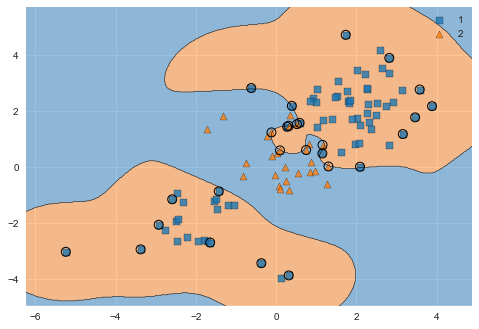

In [19]:
svm2 = SVC(kernel='rbf', gamma=1, C=1e5)
svm2.fit(X_train, y_train) # 또 다른 모델 적합

plot_decision_regions(X_train, y_train, clf=svm2, X_highlight=svm2.support_vectors_);

In [20]:
svm3 = SVC(kernel='rbf')
c_space = np.array([0.1, 1, 10, 100, 1000])
g_space = np.array([0.5, 1, 2, 3, 4])
param_grid = {'C': c_space, 'gamma': g_space}
## 이번엔 grid search 적용
tune = GridSearchCV(svm3, param_grid, cv=10)
tune.fit(X_train, y_train)

tune.cv_results_
tune.best_params_

{'C': 1.0, 'gamma': 0.5}

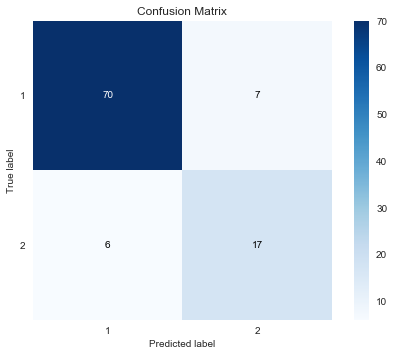

In [21]:
## 예측값
y_pred = tune.predict(X_test)

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred);

# 9.6.3 ROC Curves

In [22]:
svm4 = SVC(kernel='rbf', gamma=2, C=1, probability=True)
svm4.fit(X_train, y_train)

svm5 = SVC(kernel='rbf', gamma=50, C=1, probability=True)
svm5.fit(X_train, y_train) ## 모델 선언, 적합

y_probas4 = svm4.predict_proba(X_train) 
y_probas5 = svm5.predict_proba(X_train) # 예측(각 샘플이 클래스에 속할 확률)

C:\Users\lg\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\lg\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


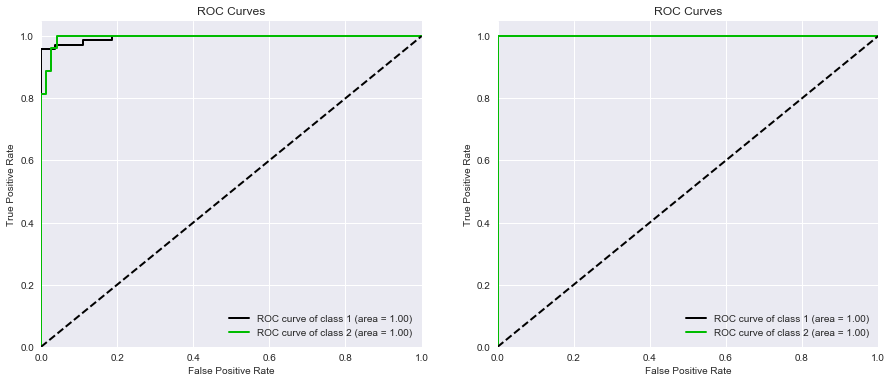

In [23]:
f, axes = plt.subplots(1, 2, sharex=False, sharey=False) ## mfrow처럼 (1,2) 형태로 그래프 2개
f.set_figheight(6)
f.set_figwidth(15)

skplt.metrics.plot_roc_curve(y_train, y_probas4, curves=['each_class'], ax=axes[0])
skplt.metrics.plot_roc_curve(y_train, y_probas5, curves=['each_class'], ax=axes[1]);

C:\Users\lg\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\lg\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


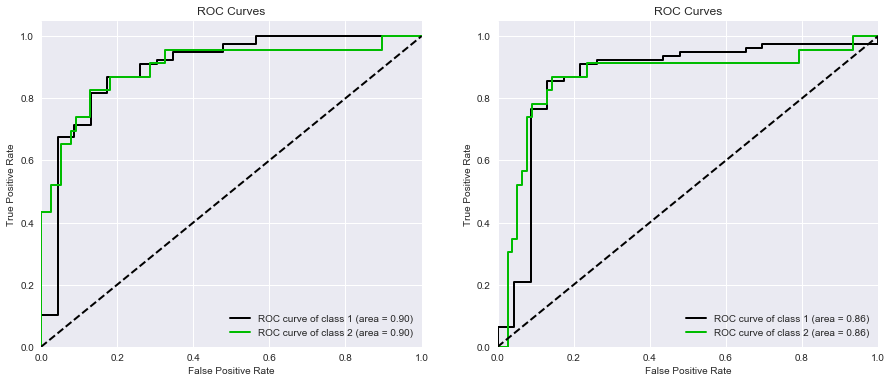

In [24]:
y_probas_test_4 = svm4.predict_proba(X_test)
y_probas_test_5 = svm5.predict_proba(X_test)

f, axes = plt.subplots(1, 2, sharex=False, sharey=False)
f.set_figheight(6)
f.set_figwidth(15)
## 위랑 다르게 y_test 이용
skplt.metrics.plot_roc_curve(y_test, y_probas_test_4, curves=['each_class'], ax=axes[0])
skplt.metrics.plot_roc_curve(y_test, y_probas_test_5, curves=['each_class'], ax=axes[1]);

# 9.6.4 SVM with Multiple Classes

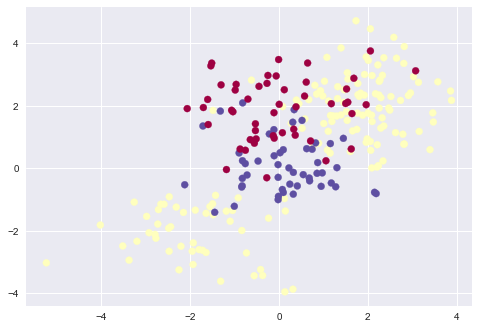

In [25]:
np.random.seed(42)

X = np.random.normal(size=400).reshape(200, 2)
X[0:100, :] += 2
X[100:150, :] -= 2
y = np.concatenate((np.full(150, 1, dtype=np.int64), np.full(50, 2, dtype=np.int64)))

X = np.concatenate((X, np.random.normal(size=100).reshape(50, 2)))
y = np.concatenate((y, np.full(50, 0, dtype=np.int64)))

X[y == 0, 1] += 2

plt.scatter(X[:, 0], X[:, 1], c=y+1, cmap='Spectral');

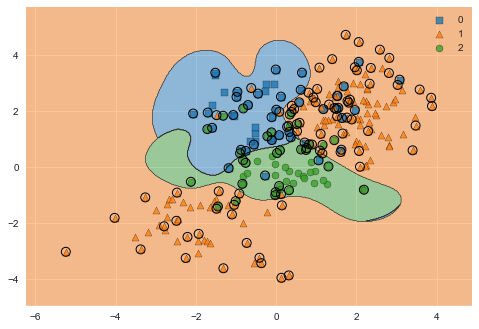

In [26]:
svm_m = SVC(kernel='rbf', C=10, gamma=1)
svm_m.fit(X, y)

plot_decision_regions(X, y, clf=svm_m, X_highlight=svm_m.support_vectors_);

# 9.6.5 Application to Gene Expression Data

In [27]:
khan_X_train = pd.read_csv('C:/Users/lg/Desktop/datasets/Khan_xtrain.csv', index_col=0)
khan_y_train = pd.read_csv('C:/Users/lg/Desktop//datasets/Khan_ytrain.csv', index_col=0)
khan_X_test = pd.read_csv('C:/Users/lg/Desktop//datasets/Khan_xtest.csv', index_col=0)
khan_y_test = pd.read_csv('C:/Users/lg/Desktop//datasets/Khan_ytest.csv', index_col=0)

In [28]:
khan_X_train.shape, khan_X_test.shape, len(khan_y_train), len(khan_y_test)

((63, 2308), (20, 2308), 63, 20)

In [29]:
khan_y_train.iloc[:, 0].value_counts(sort=False) # train data

1     8
2    23
3    12
4    20
Name: x, dtype: int64

In [30]:
khan_y_test.iloc[:, 0].value_counts(sort=False) # test data

1    3
2    6
3    6
4    5
Name: x, dtype: int64

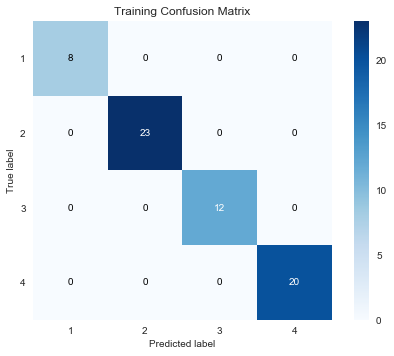

In [31]:
out = SVC(kernel='linear', C=10)
out.fit(khan_X_train, khan_y_train.iloc[:, 0])

khan_y_train_pred = out.predict(khan_X_train) ## train 이용

skplt.metrics.plot_confusion_matrix(khan_y_train, 
                                    khan_y_train_pred, 
                                    title='Training Confusion Matrix');

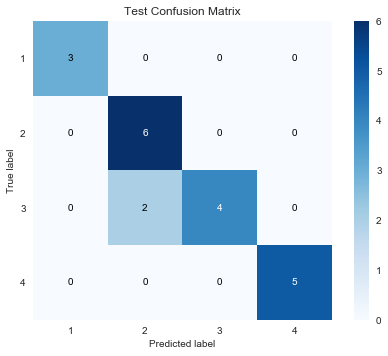

In [32]:
khan_y_test_pred = out.predict(khan_X_test) # test 이용

skplt.metrics.plot_confusion_matrix(khan_y_test, 
                                    khan_y_test_pred, 
                                    title='Test Confusion Matrix');